In [433]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt

In [434]:
M=32
f=10
j=0
fr = [0] * M

for i in range(M):
    fr[i] = mt.cos(2*mt.pi*f*i/M) #define input function (try extracting amplitude data from trace????)

In [435]:
fi = [0] * M

for k in range(M):
    if (k % 2) == 0:
        for n in range(M):
            if (n % 2) != 0:
                fi[k]=fi[k]+(2/mt.pi)*fr[n]/(k-n)
    else:
        for n in range(M):
            if (n % 2) == 0:
                fi[k]=fi[k]+(2/mt.pi)*fr[n]/(k-n) #perform discrete hilbert transform to produce imaginary component

In [436]:
N=M

#fr = [0] * M #to remove dht part of signal
ffi = [0] * N
ffr = [0] * N
Fr = [0] * N
Fi = [0] * N

J=N
n=0
j=0 #initiate variables and arrays

In [437]:
for j in range(J):
    for n in range(N):
        Fr[j]=Fr[j]+fr[n]*mt.cos(2*mt.pi*j*n/N)
        Fi[j]=Fi[j]+fr[n]*mt.sin(2*mt.pi*j*n/N)
        Fi[j]=Fi[j]+fi[n]*mt.cos(2*mt.pi*j*n/N)
        Fr[j]=Fr[j]+fi[n]*mt.sin(2*mt.pi*j*n/N) #perform discrete fourier transform

In [438]:
for n in range(N):
    for j in range(J):
        ffr[n]=ffr[n]+Fr[j]*mt.cos(2*mt.pi*j*n/N)/N
        ffi[n]=ffi[n]+Fr[j]*mt.sin(2*mt.pi*j*n/N)/N
        ffi[n]=ffi[n]+Fi[j]*mt.cos(2*mt.pi*j*n/N)/N
        ffr[n]=ffr[n]+Fi[j]*mt.sin(2*mt.pi*j*n/N)/N #perform discrete inverse fourier transform

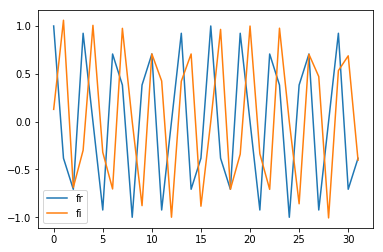

In [439]:
plt.plot(fr, label="fr")
plt.plot(fi, label="fi")
plt.legend()
plt.show()

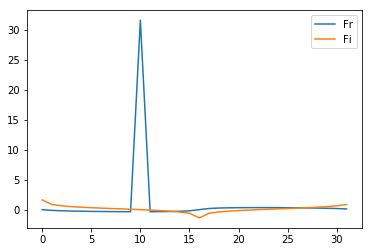

In [440]:
plt.plot(Fr,label ="Fr")
plt.plot(Fi,label ="Fi")
plt.legend()
plt.show()

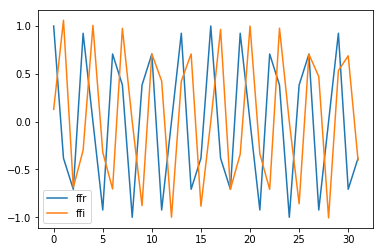

In [441]:
plt.plot(ffr, label="ffr")
plt.plot(ffi, label="ffi")
plt.legend()
plt.show()